In [305]:
import numpy as np
import pandas as pd
from sklearn import decomposition, datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn import metrics 
from scipy.spatial.distance import cdist

In [306]:
def transform(vector,df2,index):
    arr=[]
    count=0
    sum=0
    for(j,val) in enumerate(vector):
        #print("in",j,val)
        if val=="?":
            continue
        else:
            count=count+1
            value=float(val)
            sum=sum+value;
            
    mean=sum/count
    print("Mean is: ",mean)
    df2[index].replace('?',mean,inplace=True)
    #print(df2)
    return arr

In [307]:
df = pd.read_csv("C:/Users/DELL/Desktop/DM/Assignment 2/assignment2/water-treatment.data",header=None,sep=",")
df1=pd.DataFrame(df)
count=0
result=[]
for index,column in df1.iteritems():
    #print("out",index,column)
    if index==0:
        continue
    else:
        arr1=transform(column,df1,index)
        result.append(arr1)

#result   
print(df1)

Mean is:  37226.56777996071
Mean is:  2.359064885496186
Mean is:  7.810056925996194
Mean is:  188.71428571428572
Mean is:  406.8982725527831
Mean is:  227.4448669201521
Mean is:  61.39321705426356
Mean is:  4.593824701195218
Mean is:  1478.6204933586337
Mean is:  7.829981024667924
Mean is:  206.20739219712524
Mean is:  253.9525616698292
Mean is:  60.370348837209306
Mean is:  5.033598409542742
Mean is:  1496.034155597723
Mean is:  7.81195445920303
Mean is:  122.34869739478958
Mean is:  274.04633204633205
Mean is:  94.2247619047619
Mean is:  72.96848249027235
Mean is:  0.41673306772908336
Mean is:  1490.5692599620493
Mean is:  7.709885931558932
Mean is:  19.988095238095237
Mean is:  87.29469548133595
Mean is:  22.235632183908045
Mean is:  80.15176470588246
Mean is:  0.03707414829659319
Mean is:  1494.8174904942966
Mean is:  39.0858064516129
Mean is:  58.51873804971324
Mean is:  90.55420000000005
Mean is:  83.44804928131411
Mean is:  67.81736526946102
Mean is:  89.01364562118127
Mean is: 

In [308]:
df4=pd.DataFrame(df1)
del df4[0]
df4= df4.astype('float64')
df3=(df4-df4.min())/(df4.max()-df4.min())
print(df3)

           1         2         3         4         5         6         7   \
0    0.680598  0.041916  0.500000  0.387504  0.379070  0.035602  0.739554   
1    0.579121  0.086826  0.444444  0.387504  0.420930  0.060733  0.779944   
2    0.443305  0.146707  0.388889  0.387504  0.519767  0.046073  0.789694   
3    0.499151  0.101796  0.555556  0.427518  0.589535  0.049215  0.729805   
4    0.537147  0.041916  0.611111  0.518428  0.482558  0.040838  0.718663   
5    0.570087  0.086826  0.500000  0.420147  0.338372  0.046073  0.774373   
6    0.620915  0.176647  0.500000  0.387504  0.547674  0.085864  0.708914   
7    0.520817  0.146707  0.444444  0.452088  0.474419  0.123560  0.383008   
8    0.381883  0.071856  0.444444  0.429975  0.430233  0.050262  0.778552   
9    0.583558  0.056886  0.500000  0.346437  0.494186  0.053403  0.777159   
10   0.646459  0.017964  0.555556  0.388206  0.461628  0.069110  0.749304   
11   0.655733  0.041916  0.444444  0.508600  0.276744  0.101571  0.286908   

In [309]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_result = []
kmax = 10

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df3)
  labels = kmeans.labels_
  sil_result.append(silhouette_score(df3, labels, metric = 'euclidean',random_state=None))

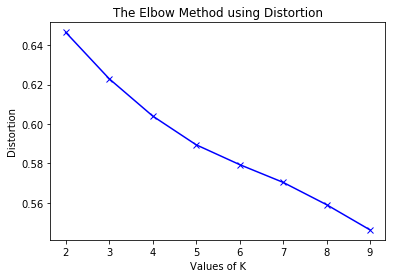

In [310]:
distortions=[]

for k in range(2,10): 
     
    kmeanModel = KMeans(n_clusters=k).fit(df3) 
    kmeanModel.fit(df3)     
    
    distortions.append(sum(np.min(cdist(df3, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df3.shape[0]) 
    
plt.plot(range(2,10), distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 
    

[0.1439119477776813, 0.1189858396134224, 0.10846212489461002, 0.11822647280591589, 0.10242278998171572, 0.09459280745410063, 0.09806133703125985, 0.09958008257913989, 0.098402708444415]


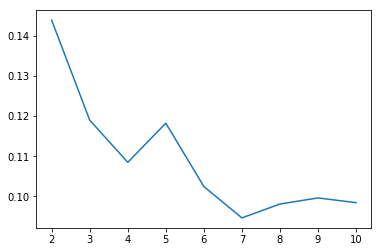

In [311]:
plt.plot(range(2,11),sil_result)
print(sil_result)

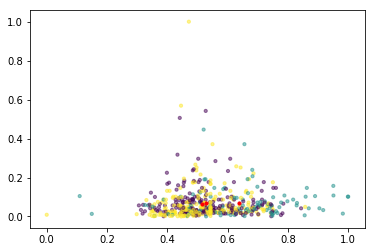

1 : 1
2 : 1
3 : 3
4 : 1
5 : 1
6 : 1
7 : 1
8 : 3
9 : 3
10 : 1
11 : 3
12 : 3
13 : 3
14 : 1
15 : 3
16 : 3
17 : 3
18 : 1
19 : 3
20 : 3
21 : 3
22 : 3
23 : 1
24 : 3
25 : 1
26 : 3
27 : 3
28 : 3
29 : 3
30 : 1
31 : 1
32 : 3
33 : 3
34 : 3
35 : 3
36 : 1
37 : 1
38 : 1
39 : 3
40 : 1
41 : 3
42 : 1
43 : 3
44 : 1
45 : 1
46 : 3
47 : 3
48 : 1
49 : 1
50 : 2
51 : 1
52 : 1
53 : 1
54 : 3
55 : 1
56 : 3
57 : 1
58 : 3
59 : 1
60 : 3
61 : 1
62 : 3
63 : 3
64 : 3
65 : 1
66 : 3
67 : 1
68 : 1
69 : 1
70 : 3
71 : 3
72 : 2
73 : 1
74 : 1
75 : 3
76 : 3
77 : 3
78 : 2
79 : 2
80 : 1
81 : 3
82 : 3
83 : 2
84 : 2
85 : 2
86 : 2
87 : 2
88 : 2
89 : 2
90 : 1
91 : 3
92 : 3
93 : 1
94 : 3
95 : 3
96 : 3
97 : 2
98 : 3
99 : 3
100 : 3
101 : 3
102 : 3
103 : 1
104 : 3
105 : 3
106 : 1
107 : 1
108 : 1
109 : 3
110 : 3
111 : 3
112 : 1
113 : 1
114 : 3
115 : 1
116 : 1
117 : 3
118 : 2
119 : 2
120 : 2
121 : 3
122 : 2
123 : 2
124 : 2
125 : 3
126 : 2
127 : 3
128 : 2
129 : 2
130 : 3
131 : 1
132 : 3
133 : 3
134 : 2
135 : 1
136 : 3
137 : 3
138 : 3
139 

In [312]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
predicted1 = kmeans.fit(df3)
predicted_result = predicted1.predict(df3)
df5= kmeans.transform(df3)
#plt.scatter(pred_y[0],pred_y[1])
vals = df3.values
#ax1 = df3.plot.scatter(x=1,y=1,c='DarkBlue')
#df3.plot.scatter(x=mini,y=mini,c='DarkBlue')
#plt.scatter(pred_y[0],pred_y[1])
#plt.scatter(df5[:, 0],df5[:, 1])
plt.scatter(df3[1],df3[2], c= kmeans.labels_, s=10, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='red')
plt.show()

for (index,value) in enumerate(predicted_result):
    print(index+1,":",value+1)
file = open('C:/Users/DELL/Desktop/DM/Assignment 2/kmeans_output.ascii', 'w')
for i in range(0,527):
    file.write("%d %d \n" %(i+1,predicted_result[i]+1))
file.close()

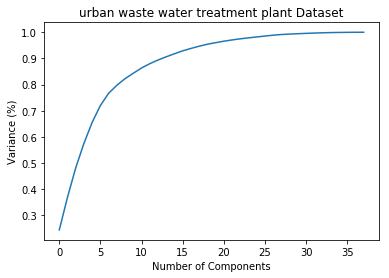

In [313]:
pca = PCA().fit(df3)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('urban waste water treatment plant Dataset')
plt.show()

In [314]:
explained_variance = pca.explained_variance_

In [315]:
explained_variance
Total_variance=0
for index,value in enumerate(explained_variance):
    Total_variance+=value

print(Total_variance*100,"%")

56.71024206891422 %


In [316]:
explained_variance

array([1.38375126e-01, 7.11226544e-02, 6.36455761e-02, 5.32108907e-02,
       4.54956408e-02, 3.64067661e-02, 2.65683226e-02, 1.72934904e-02,
       1.44287549e-02, 1.16249570e-02, 1.14280821e-02, 9.31444458e-03,
       7.90003046e-03, 7.07131474e-03, 6.53668646e-03, 6.33313268e-03,
       5.19300108e-03, 4.88712017e-03, 4.26542308e-03, 3.35518584e-03,
       3.21073924e-03, 2.71322908e-03, 2.47642054e-03, 2.05645224e-03,
       2.02704644e-03, 1.90480210e-03, 1.87393252e-03, 1.47459156e-03,
       8.99747358e-04, 8.49330761e-04, 7.26805601e-04, 6.40856811e-04,
       5.84583341e-04, 4.66551491e-04, 2.98657154e-04, 2.36816123e-04,
       1.38381445e-04, 6.68767673e-05])

In [317]:
pca = PCA(n_components=25)
dataset = pca.fit_transform(df3)
print(dataset)
data =pd.DataFrame(dataset)


[[-0.25591527  0.07551199  0.01410161 ...  0.02977579 -0.10882304
   0.06820855]
 [-0.56551428  0.11869411  0.4040275  ... -0.03145678  0.03947806
   0.03158668]
 [-0.08093441 -0.08938041  0.28941149 ...  0.02652847 -0.03203728
   0.0498231 ]
 ...
 [ 0.4015971  -0.25637659  0.23796714 ... -0.00966388 -0.03212917
  -0.00793758]
 [ 0.29399187 -0.07797815  0.3880839  ...  0.0034222  -0.01090065
   0.01606162]
 [ 0.45358763 -0.24428839  0.28343344 ...  0.00491362 -0.01822411
  -0.0301902 ]]


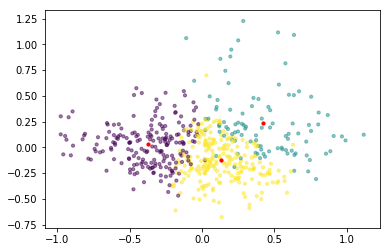

1 : 1
2 : 1
3 : 3
4 : 1
5 : 1
6 : 1
7 : 1
8 : 3
9 : 3
10 : 1
11 : 3
12 : 3
13 : 3
14 : 1
15 : 3
16 : 3
17 : 3
18 : 1
19 : 3
20 : 3
21 : 3
22 : 3
23 : 1
24 : 3
25 : 1
26 : 3
27 : 3
28 : 3
29 : 3
30 : 1
31 : 1
32 : 3
33 : 3
34 : 3
35 : 3
36 : 1
37 : 1
38 : 1
39 : 3
40 : 1
41 : 3
42 : 1
43 : 3
44 : 1
45 : 1
46 : 3
47 : 3
48 : 1
49 : 1
50 : 2
51 : 1
52 : 1
53 : 1
54 : 3
55 : 1
56 : 3
57 : 1
58 : 3
59 : 1
60 : 3
61 : 1
62 : 3
63 : 3
64 : 3
65 : 1
66 : 3
67 : 1
68 : 1
69 : 1
70 : 3
71 : 3
72 : 2
73 : 1
74 : 1
75 : 3
76 : 3
77 : 3
78 : 2
79 : 2
80 : 1
81 : 3
82 : 3
83 : 2
84 : 2
85 : 2
86 : 2
87 : 2
88 : 2
89 : 2
90 : 1
91 : 3
92 : 3
93 : 1
94 : 3
95 : 3
96 : 3
97 : 2
98 : 3
99 : 3
100 : 3
101 : 3
102 : 3
103 : 1
104 : 3
105 : 3
106 : 1
107 : 1
108 : 1
109 : 3
110 : 3
111 : 3
112 : 1
113 : 1
114 : 3
115 : 1
116 : 1
117 : 3
118 : 2
119 : 2
120 : 2
121 : 3
122 : 2
123 : 2
124 : 2
125 : 3
126 : 2
127 : 3
128 : 2
129 : 2
130 : 3
131 : 1
132 : 3
133 : 3
134 : 2
135 : 1
136 : 3
137 : 3
138 : 3
139 

In [318]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
predicted_values = kmeans.fit_predict(dataset)
#plt.scatter(pred_y[0],pred_y[1])
#vals = dataset.values
#ax1 = df3.plot.scatter(x=1,y=1,c='DarkBlue')
#df3.plot.scatter(x=mini,y=mini,c='DarkBlue')
#plt.scatter(pred_y[0],pred_y[1])
plt.scatter(data[0],data[1], c= kmeans.labels_, s=10, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=10, c='red')
plt.show()
for (index,value) in enumerate(predicted_values):
    print(index+1,":",value+1)
    
f = open('C:/Users/DELL/Desktop/DM/Assignment 2/pca_output.ascii', 'w')
for i in range(0,527):
    f.write("%d %d \n" %(i+1,predicted_values[i]+1))
f.close()